In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
%matplotlib inline

厕所排队问题：

1. 两场电影结束时间相隔较长，互不影响
2. 每场电影结束之后会有20个人想上所
3. 这20个人会在O到10分钟之内全部到达周所
4. 每个人上则所时间在1-3分钟之间

- 首先模拟最简单的情况，也就是则所只有一个位置，不考虑两人共用的情况则每人必须等上一人出恭完毕方可进行
- 分析:对于每个人都有如下几个参数
- 到达时间/等待时间/开始上则所时间/结束时间

In [4]:
arrivingtime = np.random.uniform(0, 10, size=20)
arrivingtime.sort()
workingtime = np.random.uniform(1, 3, size=20)

In [5]:
arrivingtime

array([0.72250468, 0.7268355 , 1.21690877, 2.06454682, 2.4115663 ,
       2.68611152, 3.37249271, 4.39421525, 5.00024494, 5.26221649,
       5.32449425, 6.31320916, 7.14516559, 7.23762278, 7.4213259 ,
       7.49752208, 7.98912154, 8.51454648, 9.91988036, 9.9914005 ])

In [6]:
workingtime

array([1.83503322, 2.57499055, 2.25634346, 1.04026337, 1.16273744,
       2.30087205, 2.64006317, 2.20574255, 2.48485984, 1.75770039,
       2.87710617, 2.56382324, 2.56675626, 1.91042458, 1.84612115,
       2.94534208, 1.5655957 , 1.17841554, 2.95004847, 1.32516387])

In [7]:
# 填充数据列表
startingtime = [0 for _ in range(20)]
finishingtime = [0 for _ in range(20)]
waitingtime = [0 for _ in range(20)]
emptytime = [0 for _ in range(20)]

In [8]:
startingtime[0] = arrivingtime[0]
finishingtime[0] = startingtime[0] + workingtime[0]
waitingtime[0] = startingtime[0] - arrivingtime[0]

print(startingtime[0], workingtime[0], finishingtime[0], waitingtime[0])

0.7225046758794218 1.8350332239547233 2.557537899834145 0.0


In [17]:
for i in range(1, 20):
    if finishingtime[i - 1] > arrivingtime[i]:
        startingtime[i] = finishingtime[i - 1]
    else:
        startingtime[i] = arrivingtime[i]
        emptytime[i] = arrivingtime[i] - finishingtime[i - 1]
    finishingtime[i] = startingtime[i] + workingtime[i]
    waitingtime[i] = startingtime[i] - arrivingtime[i]
    print(
        '第{}个人：到达时间        开始时间          工作日间            完成时间            等待时间\n'
        .format(i), arrivingtime[i], startingtime[i], workingtime[i],
        finishingtime[i], waitingtime[i], '\n')

第1个人：到达时间        开始时间          工作日间            完成时间            等待时间
 0.7268354981072689 2.557537899834145 2.5749905546073757 5.132528454441521 1.830702401726876 

第2个人：到达时间        开始时间          工作日间            完成时间            等待时间
 1.2169087728383932 5.132528454441521 2.2563434610934157 7.388871915534937 3.9156196816031272 

第3个人：到达时间        开始时间          工作日间            完成时间            等待时间
 2.0645468201024486 7.388871915534937 1.0402633712731584 8.429135286808094 5.3243250954324886 

第4个人：到达时间        开始时间          工作日间            完成时间            等待时间
 2.411566301332516 8.429135286808094 1.1627374377576523 9.591872724565746 6.017568985475578 

第5个人：到达时间        开始时间          工作日间            完成时间            等待时间
 2.686111524975361 9.591872724565746 2.30087205072284 11.892744775288588 6.905761199590385 

第6个人：到达时间        开始时间          工作日间            完成时间            等待时间
 3.372492709177153 11.892744775288588 2.640063171586701 14.532807946875288 8.520252066111436 

第7个人：到达时间        开始时间  

In [18]:
print('平均等待时间：', np.mean(waitingtime))

平均等待时间： 15.382958175949236


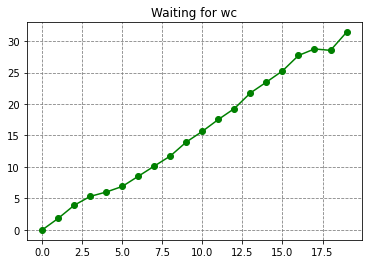

In [22]:
fig = plt.figure(figsize=(6, 4))
plt.plot(waitingtime, '-go')
plt.grid(True, linestyle='--', color='gray', linewidth='0.8')
plt.title('Waiting for wc')
plt.show()